In [1]:
# Qtn-1: Find the probability for the case l>t?

In [2]:
# Attached answer as PDF or JPEG file

In [3]:
# Qtn-2: Find the probability using Monte Carlo Simulation for l<t , for the general case and fnd the value of pi using
# some special case (e.g l=2, and t=3)

In [4]:
import random
import numpy as np
from numpy import sin, cos, arccosh, arccos, pi, sqrt

class BuffonNeedlePblm:
    
    def __init__(self, needle_len, strip_width, trial):
        self.needle_len = needle_len
        self.strip_width = strip_width
        self.trial = trial
    
    def simulate(self):
        successful_hit = 0;
        for i in range(int(self.trial)) :
            theta = pi*random.random()/2
            if self.needle_len * sin(theta) > self.strip_width - self.strip_width*random.random(): 
                successful_hit += 1
        return successful_hit/self.trial

    def set_seed(self,seed_value=None):
        random.seed(seed_value)
        
    def estimate_pi(self):
        x = self.needle_len/self.strip_width
        if self.needle_len <= self.strip_width:
            return 2 * self.needle_len / (self.simulate()*self.strip_width)
        else:
            sim_results = self.simulate()
            return 2/ sim_results * (x - sqrt([x*x-1]) + np.cos(x*sim_results/180) )
    
    def analytic_probability(self):
        #return (2 * self.needle_len) / (self.strip_width * pi)
        if self.needle_len <= self.strip_width:
            return self.analytic_prob_short()
        else:
            return self.analytic_prob_long()
        
    def analytic_prob_short(self):
        #return (2 * self.needle_len) / (self.strip_width * pi)
        x = self.needle_len/self.strip_width
        return (2 * x) / (pi)
    
    def analytic_prob_long(self):
        x = self.needle_len/self.strip_width
        return (2/pi*(x - sqrt([x*x-1])+ np.cos(x*pi/180)))

In [5]:
#Special case for needle_length=2 and strip_width = 3
buffon = BuffonNeedlePblm(needle_len=2, strip_width=3,trial=10e4)
buffon.set_seed()
buffon.estimate_pi()

3.1429491863690298

In [6]:
buffon.analytic_probability()

0.42441318157838753

In [7]:
#Qtn-3: Find the probability using Monte Carlo simulation (l > t) for the general case. 
#From the probability formula we found for l < t, the probability is linear with l/t.

In [8]:
buffon = BuffonNeedlePblm(needle_len=4, strip_width=3,trial=10e4)
buffon.set_seed()
buffon.estimate_pi()

array([3.86906082])

In [9]:
buffon.analytic_probability()

array([0.9238279])

In [10]:
strip_width_case2 =  np.logspace(1, 3, 100)
strip_width_case2 = np.array([int(i) for i in strip_width_case2])


needle_len_case2 =  np.logspace(4, 6, 100)
needle_len_case2 = np.array([int(i) for i in needle_len_case2])

strip_needle_tuple_list_case2 = [(strip_width_case2[i], needle_len_case2[i]) for i in range(len(needle_len_case2))]
res_list_mc_case2 = []
res_list_prob_case2 = []
for i in strip_needle_tuple_list_case2:
    buffon = BuffonNeedlePblm(needle_len=i[1], strip_width=i[0],trial=10e4)
    pi_val = buffon.estimate_pi()
    res_list_mc_case2.append(pi_val)
    res_list_prob_case2.append(buffon.analytic_probability())

In [11]:
#Qtn-4: After writing your general code in Part 3 plot the Probability vs l/t ratio. 
#Hint: You need to run the simulations for different values of (l/t)


In [12]:
needle_strip_ratio_list_case2 = [needle_len_case2[i]/strip_width_case2[i] for i in range(len(needle_len_case2))]

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

plt.plot(res_list_mc_case2, needle_strip_ratio_list_case2, '-.', markersize=2,
         label=r"Probability Vs len/width ratio") 

plt.title(r"Monte Carlo simulation", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(bbox_to_anchor=(1, 0.75), fontsize=18, markerscale=10)


plt.show()

<Figure size 800x800 with 1 Axes>

In [14]:
# Qtn-5: Plot the analytic formula for P(l/t) along side your previous result and comment on the result.

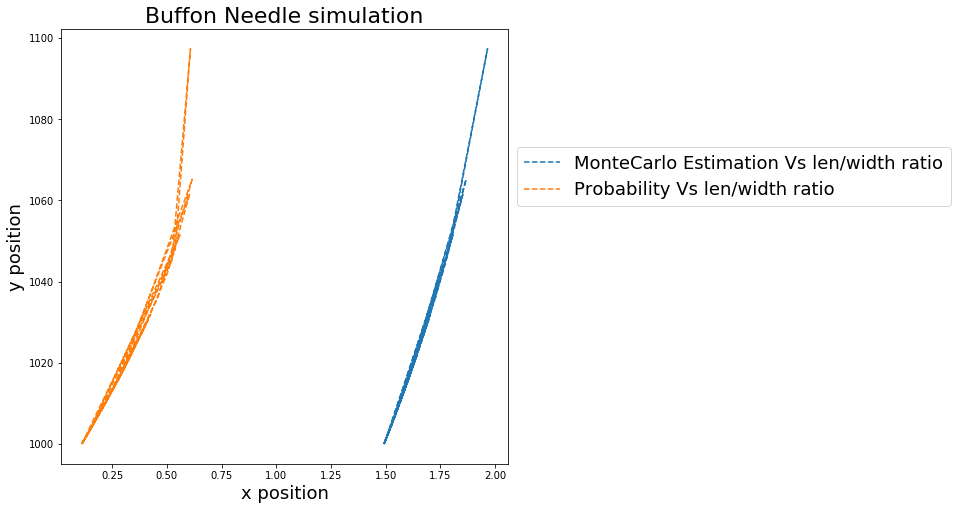

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

plt.plot(res_list_mc_case2, needle_strip_ratio_list_case2, '--', markersize=2,
         label=r"MonteCarlo Estimation Vs len/width ratio") 

plt.plot(res_list_prob_case2, needle_strip_ratio_list_case2, '--', markersize=2,
         label=r"Probability Vs len/width ratio") 

plt.title(r"Buffon Needle simulation", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(bbox_to_anchor=(1, 0.75), fontsize=18, markerscale=10)


plt.show()